# Tobig's 15기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.74340391, 0.07097286, 0.4486071 ])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [41]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1+e^{-z}}$ , 단 $z = X_i \theta$

In [42]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p = 1/(1 + np.exp(-z))
    return p

In [43]:
logistic(X_train.iloc[1], parameters)

0.5786357960232279

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) =-\Sigma\{y_i\log(p) + (1-y_i)\log(1-p)\}$

In [15]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = y*np.log(p) + (1-y)*np.log(1-p)
    return -loss

In [16]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X,parameters)
    loss = 0.5 * (y - y_hat)^2
    return loss

In [17]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [18]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.120295402874429

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\Sigma(y_i - \theta^{T}X_i)x_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)= -\Sigma(y_i - p_i)x_{ij}$

In [19]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = (y - y_hat)*X[j]
    else:
        p = logistic(X,parameters)
        gradient = (y - p)*X[j]
    return -gradient

In [20]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.08254939233985932

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [23]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X,y,parameters, j, model)
    
    return gradients

In [24]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[58.249345383345485, -5.517014677446889, 29.588753261787282]

## mini-batch
인덱스로 미니 배치 나누기

In [25]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 이 함수는 학습시 어떠한 optimizer를 사용할지 지정하는 함수 이다.  batch_size가 1일 경우 모든 데이터를 하나씩 return하기 때문에 Stochastic Gradient Descent에 해당하고 1 < batch_size < len(X_train) 인 경우는 데이터를 batch 단위로 묶어서 최적화를 진행하기 때문에 Mini-batch Gradient Descent에 해당하고 batch_size = len(X_train)의 경우 전체 데이터를 한번에 학습을 하고 갱신하기 때문에 Batch Gradient Descent에 해당한다

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [26]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate
    
    parameters -= gradients
    return parameters

In [27]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.16091046, 0.126143  , 0.15271956])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: batch 단위가 끝나면 1 epoch 학습했다고 함
- num_epoch: 최대 몇번 반복하여 학습을 할 것인지

<br>

BGD: 데이터의 gradients를 구하고 평균을 진행한 후 한꺼번에 갱신 한다. 즉, 데이터 전체를 다 보고 갱신이 일어나므로 학습이 굉장히 오래 걸리지만 성능은 좋다. 또한 정확한 방향으로 수렴한다. 하지만 local minimum에 빠질 위험히 크다. <br>
SGD: 임의의 데이터 하나의 gradients를 구하고 즉시 갱신한다. BGD에 비해 시간이 빠르지만 임의의 데이터를 추출하기 때문에 진자 운동과 같은 결과로 이어져 수렴이 늦을 수 있다. <br>
MGD: BGD와 SGD의 단점을 보완하기 위해 데이터를 작은 집단으로 나누어 한꺼번에 gradients를 구하고 갱신을 진행한다. 
<br>

batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> "Stochastic Gradient Descent"  
batch_size=k -> "Mini batch Gradient Descent"  
batch_size=whole -> "Batch Gradient Descent"  

In [48]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch,parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(idx))
            new_loss = batch_loss(X_batch, y_batch, parameters,loss_function,len(idx))
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

In [51]:
new_param_bgd = gradient_descent(X_train, y_train,)
new_param_bgd

epoch: 0  loss: 0.34313555823009295  params: [-0.89039903  0.88120829 -1.09472595]  gradients: [0.09143608130040028, 0.09783991681556575, 0.15418267365622232]
epoch: 100  loss: 0.15040226317802166  params: [-1.95228052  4.17931809 -4.05832419]  gradients: [0.05011304952283638, 0.07506084589472427, 0.0853821789698796]
epoch: 200  loss: 0.15039902311686212  params: [-1.95231597  4.17942224 -4.05841886]  gradients: [0.05011266775622351, 0.07506045689254029, 0.08538107396980038]
epoch: 300  loss: 0.1503990228910306  params: [-1.95231597  4.17942225 -4.05841887]  gradients: [0.05011266772961534, 0.07506045686542741, 0.08538107389278259]
epoch: 400  loss: 0.15039902289101492  params: [-1.95231597  4.17942225 -4.05841887]  gradients: [0.050112667729613404, 0.0750604568654254, 0.08538107389277716]
epoch: 500  loss: 0.15039902289101492  params: [-1.95231597  4.17942225 -4.05841887]  gradients: [0.050112667729613404, 0.0750604568654254, 0.08538107389277716]
epoch: 600  loss: 0.15039902289101492 

array([-1.95231597,  4.17942225, -4.05841887])

    default값으로 학습을 시킨 결과이다. 이 경우 밑의 경우와 다르게 learning_rate 가 0.1 인데 loss를 확인해 보면 learning_rate = 0.01 보다 빠르게 줄어드는것을 확인할 수 있다.
    
    learning_rate가 0.1 일때의 loss는 300 epochs 이후로는 더이상 변하지 않으며 parameters 또한 변하지 않는다는것을 확인할 수 있지만 learning_rate가 0.01 일때는 꾸준히 loss가 떨어지며 parameters 또한 조금씩 변하고 있다는것을 확인할 수 있다. 
    


## Logistic Regression

In [52]:
new_param_mgd = gradient_descent(X_train, y_train,learning_rate=0.01, batch_size= 64) # MGD
new_param_mgd

epoch: 0  loss: 0.8592137441374152  params: [-0.15293751  0.74969845  0.27523854]  gradients: [0.05056333323546503, 0.049499361335893, 0.10582634514499047]
epoch: 100  loss: 0.3061007800054585  params: [-1.63894158  3.48547137 -3.31789765]  gradients: [0.010972094477515576, 0.0027771731623775255, 0.003250675596712339]
epoch: 200  loss: 0.3003347990452867  params: [-1.79438357  3.99031451 -3.78640669]  gradients: [0.013335375999857763, 0.003446464685886267, 0.0007817383081805951]
epoch: 300  loss: 0.29946359435013864  params: [-1.84593016  4.15659675 -3.93969121]  gradients: [0.01407116688391399, 0.0036492920963335095, 7.348220561099066e-05]
epoch: 400  loss: 0.2992558806152428  params: [-1.86504106  4.2181313  -3.99629197]  gradients: [0.014337709115415247, 0.0037218869950502217, -0.0001771808123605112]
epoch: 500  loss: 0.2991919177143735  params: [-1.87238676  4.24176798 -4.01801598]  gradients: [0.014439254869398028, 0.0037494090863584768, -0.0002718993890771341]
epoch: 600  loss: 0

array([-1.87704698,  4.25675908, -4.03178901])

In [72]:
new_param_bgd = gradient_descent(X_train, y_train, learning_rate = 0.01, batch_size = len(X_train)) # BGD
new_param_bgd

epoch: 0  loss: 0.6860786534744289  params: [-0.10968034  0.43634108  0.22625849]  gradients: [0.40872497891892373, 0.15228153948293843, 0.472945590311182]
epoch: 100  loss: 0.3023798457213181  params: [-1.62850332  3.48957394 -3.31488439]  gradients: [0.0027449672476518626, -0.00903102987870028, 0.008440562271695524]


array([-1.78082106,  3.98736604, -3.77765723])

In [71]:
new_param_sgd = gradient_descent(X_train, y_train, learning_rate = 0.01, batch_size = 1) # sgd
new_param_sgd

epoch: 0  loss: 1.0383637324127009  params: [0.29880605 0.1816933  0.28947564]  gradients: [0.00648618940865367, 0.0035297904800225084, 0.0045636228174223414]
epoch: 100  loss: 0.11941529659046486  params: [-1.62680404  3.46015266 -3.29887879]  gradients: [0.0011276274381459331, 0.0006136559303786764, 0.0007933882256673788]
epoch: 200  loss: 0.09717816921291196  params: [-1.78722101  3.97905939 -3.78119467]  gradients: [0.0009274536712645416, 0.0005047211749820031, 0.0006525478165404864]
epoch: 300  loss: 0.09081112649416749  params: [-1.84027698  4.14954254 -3.93855716]  gradients: [0.0008693334837082603, 0.0004730921133237701, 0.0006116549906648131]
epoch: 400  loss: 0.08856147538606417  params: [-1.85995412  4.21265672 -3.99668208]  gradients: [0.0008487115319765412, 0.0004618696274671299, 0.000597145576348744]
epoch: 500  loss: 0.08771125282635572  params: [-1.86752654  4.23692977 -4.01901766]  gradients: [0.0008409059767781415, 0.00045762183686239634, 0.0005916536599766225]
epoch:

array([-1.87234267,  4.25236334, -4.03321395])

    위의 세 결과는 optimizer 방법에 따른 성능을 비교한 것이다. 
    
    MGD의 경우 loss가 천천히 떨어짐을 확인 할 수 있고, parameters또한 값이 조금식 변한다는 것을 확인할 수 있다.
    이에 비해 BGD의 경우 100번의 epoch 끝에 학습이 종료 되었는데 이는 tolerance, step이 너무 작아 더이상 학습이 무의미 하다는것을 알 수 있다. 이것을 다르게 말하면 Local minimum의 문제를 발생했다고 볼 수 있다.
    SGD의 경우 앞으 두 경우와 다르게 굉장히 낮은 loss를 볼 수 있다. 100 epochs 사이에 loss값이 1에서 0.1로 줄었다. 이 경우는 앞의 BGD의 경우와 다르게 Global minimum에 도착했다고 볼 수 있다. 
    
    세 경우 파라미터를 비교해 보면 큰 차이는 나지 않지만 loss차이가 큰 것을 보아 하나의 최적화 방법만 고집할 것이 아니라 다양한 최적하 방법을 고려 해야겠다.

### Predict Label

- 위에서 완성한 함수들을 통해 test에 적용시켜 y_hat을 구한 후 모델을 평가한다.

In [73]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [74]:
from sklearn.metrics import *

In [75]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 1,  9]], dtype=int64)

In [77]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

accuracy: 0.94
precision: 0.8181818181818182
recall: 0.9
f1_score: 0.8571428571428572


    성능을 확인해 보면 정확도 94%, precision 81%, recall 90%, f1_score = 85%로 모든 성능지표를 고려하여도 좋은 모델을 만듦을 확인 할 수 있다.

## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [78]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [79]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [80]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.61376898, 2.67551012])

In [86]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate= 0.0001,num_epoch=100 ,batch_size = 1)
new_param

epoch: 0  loss: -1.5258474839719138  params: [0.59733168 0.51363395]  gradients: [-0.0002183168996972886, -0.00015773689055796516]


array([2.20752783, 1.61390649])

* 임의로 생성한 데이터로 인해 loss는 음수가 나오며 epochs를 늘릴수록 loss는 nan값에 가까워져 parameters들이 기하 급수적으로 증가하여 제한된 모델을 설정하였다.

In [87]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

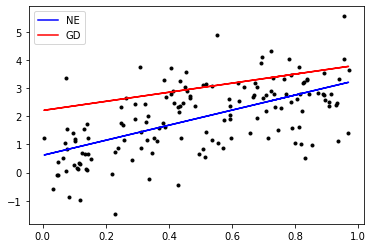

In [88]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()

    위의 결과는 임의의 데이터를 설명하는 정규방정식과 경사하강법으로 구한 parameter들로 plot을 그려본 결과이다. 두 함수의 경우 차이가 나지만 어느정도 데이터를 설명할 수 있음을 확인 할 수 있다.